In [2]:
# load binary file
import numpy as np
import time, suite2p

def tic():
    return time.time()
def toc(i0):
    return time.time() - i0

ops = {
        'diameter':12, # this is the main parameter for cell detection
        'tau':  1., # this is the main parameter for deconvolution
        'fs': 10.,  # sampling rate (total across planes)           
        'data_path': 'H:/DATA/2017-10-13/',
        'subfolders': ('4'),
        'nplanes' : 1, # each tiff has these many planes in sequence
        'nchannels' : 1, # each tiff has these many channels per plane  
        'functional_chan' : 1, # this channel is used to extract functional ROIs (1-based)
        'align_by_chan' : 1, # when multi-channel, you can align by non-functional channel (1-based)
        'look_one_level_down': False,        
        'baseline': 'maximin', # baselining mode
        'win_baseline': 60., # window for maximin
        'sig_baseline': 10., # smoothing constant for gaussian filter 
        'prctile_baseline': 8.,# smoothing constant for gaussian filter        
        'neucoeff': .7,  # neuropil coefficient 
        'neumax': 1.,  # maximum neuropil coefficient (not implemented)
        'niterneu': 5, # number of iterations when the neuropil coefficient is estimated (not implemented)
        'maxregshift': 0.,
        'subpixel' : 10,
        'batch_size': 200, # number of frames per batch
        'num_workers': 0, # 0 to select num_cores, -1 to disable parallelism, N to enforce value        
        'nimg_init': 400, # subsampled frames for finding reference image        
        'navg_frames_svd': 5000,
        'nsvd_for_roi': 1000,
        'ratio_neuropil': 5,
        'tile_factor': 1,        
        'threshold_scaling': 1,
        'Vcorr': [],
        'allow_overlap': False,
        'inner_neuropil_radius': 2, 
        'outer_neuropil_radius': np.inf, 
        'min_neuropil_pixels': 350, 
        'ratio_neuropil_to_cell': 3,     
        'nframes': 1,
        'diameter': 12
      }

#ops = {**ops0, **ops1} # replace default values with saved ones


i0 = tic()
ops1 = suite2p.main(ops)
print(toc(i0))

cells: 415, cost: 0.6492, time: 36.1503
cells: 740, cost: 0.6394, time: 77.4110
cells: 1034, cost: 0.6339, time: 122.9402
cells: 1247, cost: 0.6305, time: 171.7387
cells: 1375, cost: 0.6287, time: 221.4567
cells: 1426, cost: 0.6281, time: 271.1997
cells: 1445, cost: 0.6279, time: 320.6116
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
976.109381198883


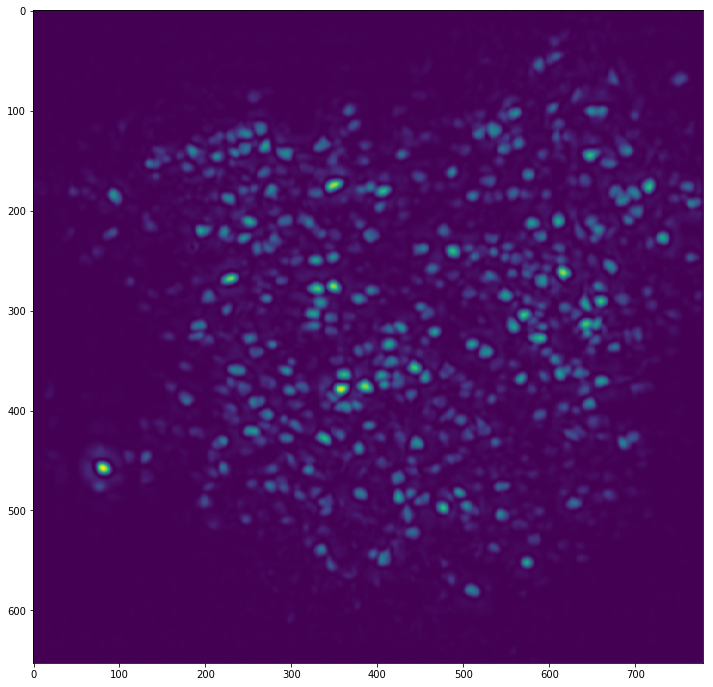

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
%matplotlib inline

plt.figure(figsize=(12,12))
plt.imshow(ops1[0]['Vcorr'], aspect='auto')
plt.show()

In [ ]:
import scipy.stats as stats
plt.figure(figsize=(12,12))
dF = F - Fneu
dF = stats.zscore(dF, axis=1)

plt.plot(dF[:10, :].transpose())
#plt.imshow(dF, aspect='auto', vmin=-2, vmax=5)
plt.show()

In [ ]:
Lyc = ops['Lyc']
Lxc = ops['Lxc']

r = np.random.random((len(stat),))
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1, 1, 1)
rgb = celldetect.drawClusters(r, mPix.transpose(), mLam.transpose(),Lyc,Lxc)    
ax.imshow(rgb)       

In [ ]:
def removeBadFrames(ops,F,Fneu):
    '''add nan's when bad frames occur (high movement frames) '''
    return F,Fneu

def activityStat(stat,F,Fneu):
    dF = F - 0.7 * Fneu
    sd = F.std(axis=1)
    sdN = Fneu.std(axis=1)
    std_cell = sd / sdN
    skew = np.skew(dF,axis=1)
    for n in range(ncells):
    return stat

In [ ]:
print(stat[2]['radius'])
inner_radius = 2
expanded_cell_pix = ndimage.grey_dilation(cell_pix, (inner_radius,inner_radius))
plt.subplot(121)
plt.imshow(cell_pix[:100,:100])
plt.subplot(122)
plt.imshow(expanded_cell_pix[:100,:100])
plt.show()
print(expanded_cell_pix[:100,:100])

In [ ]:
n+=1
plt.imshow(neuropil_masks[n,:,:])
plt.plot(stat[n]['med'][1],stat[n]['med'][0],'o')
neuropil_masks[n,:,:].sum()

In [ ]:
n = 410
mask = np.zeros((Ly,Lx))
overlap = stat[n]['overlap']
ipix = stat[n]['ipix'][~overlap]
ypix = stat[n]['ypix'][~overlap]
xpix = stat[n]['xpix'][~overlap]
lam  = stat[n]['lam'][~overlap]
lam = lam / lam.sum()
print(lam)
mask[ypix,xpix] = lam
params = utils.fitMVGaus(ypix,xpix,lam,2)
plt.imshow(mask)
plt.plot(params[3][:,1],params[3][:,0])
#plt.plot(ypix[lam>.001],xpix[lam>.001],'.')
mu = params[0]
plt.xlim([mu[1]-10,mu[1]+10])
plt.ylim([mu[0]-10,mu[0]+10])
plt.show()